## Steps in House Price Prediction

Imported essential Python libraries for data analysis and machine learning.

Loaded the house price dataset from a CSV file.

Inspected the dataset structure and column information.

Analyzed basic statistical details of the data.

Checked for missing or null values in the dataset.

Cleaned the data by handling missing values.

Identified the input features and target variable.

Performed exploratory data analysis to understand data patterns.

Visualized correlations between features and house prices.

Split the dataset into training and testing sets.

Built a Linear Regression model using training data.

Generated predictions on the test dataset.

Evaluated the model using MAE, RMSE, and R² metrics.

Saved the trained model for future price prediction use.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
file_path = "/content/House Price Prediction Dataset.csv"
df = pd.read_csv(file_path)


In [4]:
df.head()


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [6]:
df.describe()


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [7]:
df.isnull().sum()


,0
Id,0
Area,0
Bedrooms,0
Bathrooms,0
Floors,0
YearBuilt,0
Location,0
Condition,0
Garage,0
Price,0


In [9]:
df = df.dropna()


In [10]:
X = df.drop("Price", axis=1)
y = df["Price"]


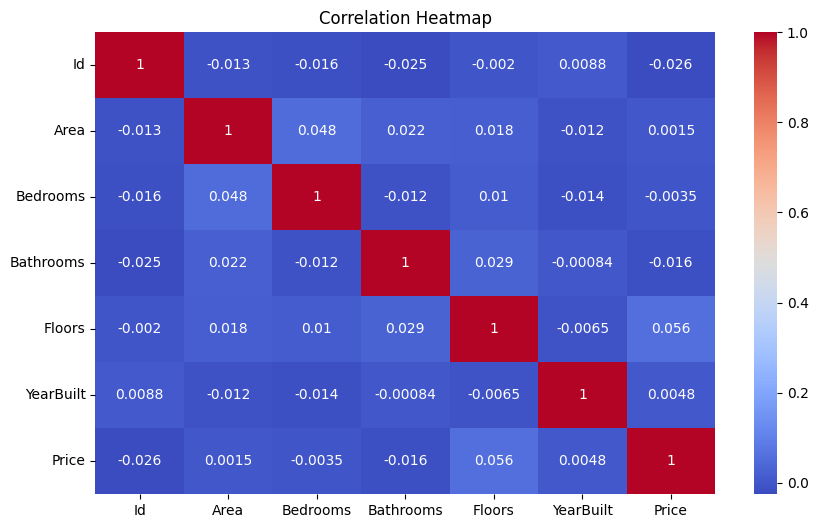

In [12]:
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

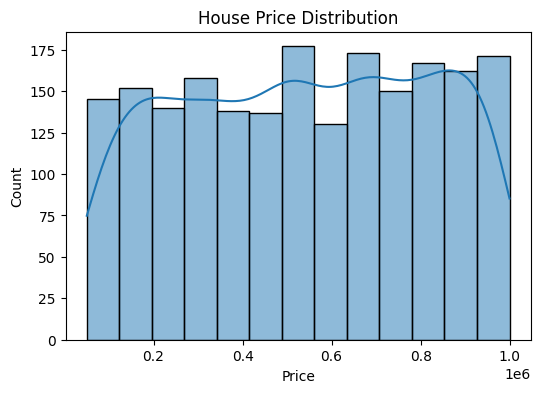

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(y, kde=True)
plt.title("House Price Distribution")
plt.show()


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns from X_train
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create a ColumnTransformer to apply OneHotEncoder to categorical features
# and pass through numerical features.
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep numerical columns as they are
)

# Apply the preprocessing to X_train and X_test
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

model = LinearRegression()
model.fit(X_train_processed, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test_processed)

In [21]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)

MAE : 242867.44926338634
RMSE: 279785.21069002635
R²  : -0.006181784611834162


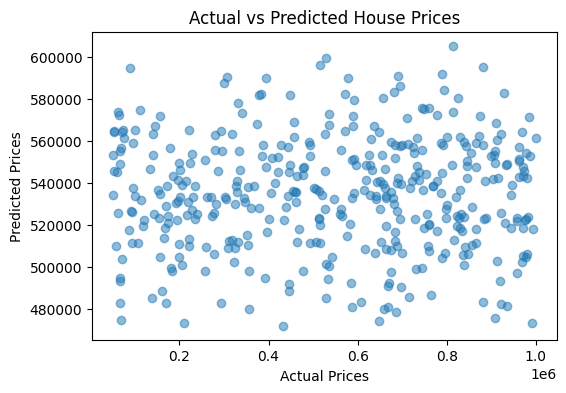

In [22]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [25]:
transformed_feature_names = preprocessor.get_feature_names_out()

coeff_df = pd.DataFrame({
    "Feature": transformed_feature_names,
    "Coefficient": model.coef_
})

coeff_df.sort_values(by="Coefficient", ascending=False)

,Feature,Coefficient
14,remainder__Floors,23582.408499
5,cat__Condition_Fair,20201.726647
2,cat__Location_Suburban,11026.385579
1,cat__Location_Rural,1742.712612
9,cat__Garage_Yes,1109.324742
7,cat__Condition_Poor,542.005420
15,remainder__YearBuilt,116.775334
12,remainder__Bedrooms,53.249124
11,remainder__Area,-0.484192
10,remainder__Id,-12.007473


In [26]:
import pickle

with open("house_price_model.pkl", "wb") as file:
    pickle.dump(model, file)


In [29]:
with open("house_price_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Transform the input data using the preprocessor used during training
transformed_input = preprocessor.transform(X.iloc[0:1])

loaded_model.predict(transformed_input)

array([553704.61202109])